# Analysis of repeated injections of the same sample

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
from pprint import pprint
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 100

spectra_directory = "/Users/jonesm5/Dropbox (The Francis Crick)/Serum_RepInj"

Read in all spectra from folder:

In [2]:
spectra = glycoproteomics.io.read_spectra_directory(spectra_directory)
pprint(list(spectra.keys()))

['20210616_serum_repinj_2.5ug_10.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_4.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_9.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_3.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_7.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_6.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_1.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_2.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_8.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_5.wiff.dia.extracted.txt']


Bin the spectra to make them easier to work with and merge

In [3]:
rt_x_bin_size = 0.06
mz_y_bin_size = 2.0

binned_spectra = {
    name: glycoproteomics.spectrum.bin(
        spectrum,
        rt_x_bin_size,
        mz_y_bin_size,
        np.mean)
    for name, spectrum in spectra.items()
}
del(spectra)

Merge the spectra and plot the resulting merged spectrum.

In [4]:

merged_spectrum = glycoproteomics.spectrum.combine(binned_spectra, np.sum)
ions = glycoproteomics.spectrum.list_ions(merged_spectrum)
print(ions)

['366.14']


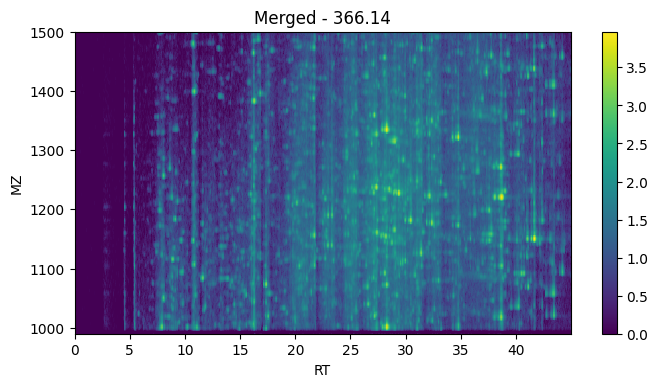

In [5]:
ion = ions[0]
merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(merged_spectrum, ion)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    "Merged - " + ion,
    figure_size,
    dpi
)
plt.show()

Calling the top 100 peaks from this file

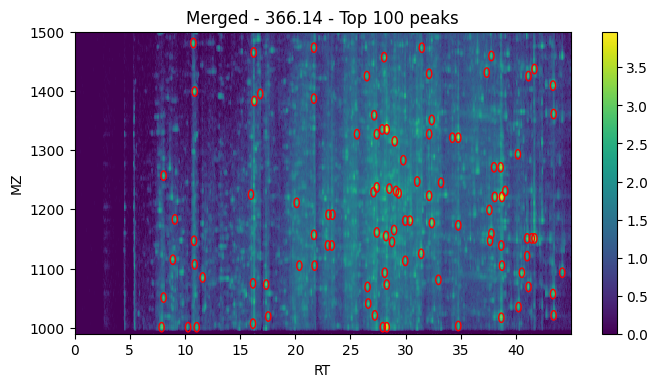

In [6]:
top_N_peaks = 100
x_radius = rt_x_bin_size * 4.0
y_radius = mz_y_bin_size * 4.0

peaks = glycoproteomics.peaks.find(
    merged_ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    x_radius,
    y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "Merged - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()

For each spectra, return the summed values for each peak and plot the spectra.

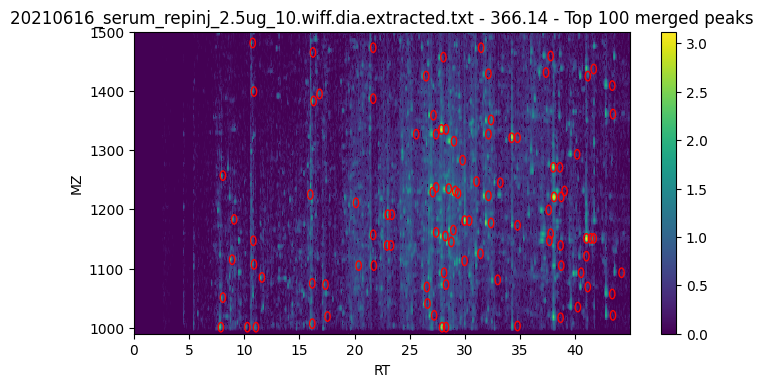

[499.797978, 93.85754125, 690.24686, 764.9063189999999, 689.4692825]


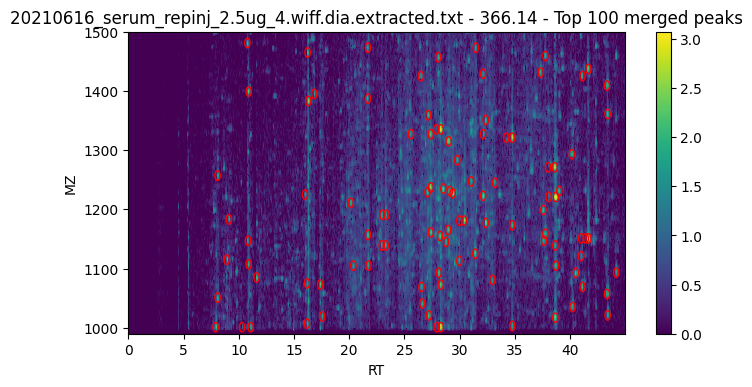

[10600.386419999999, 12727.22536, 9566.5445625, 7256.893905, 4436.890740000001]


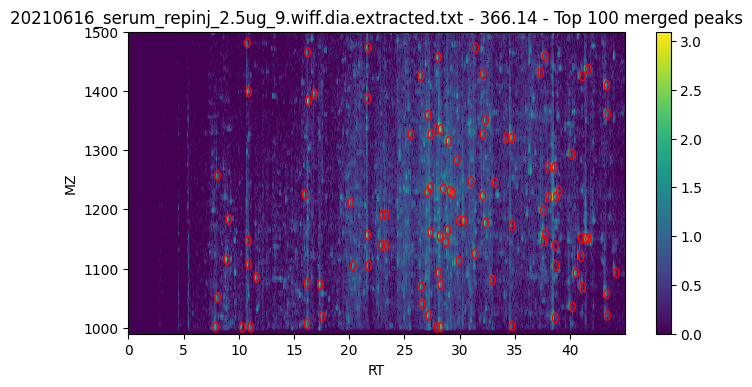

[1806.21186, 2828.64325225, 11175.7682375, 6650.342140000001, 4863.039015]


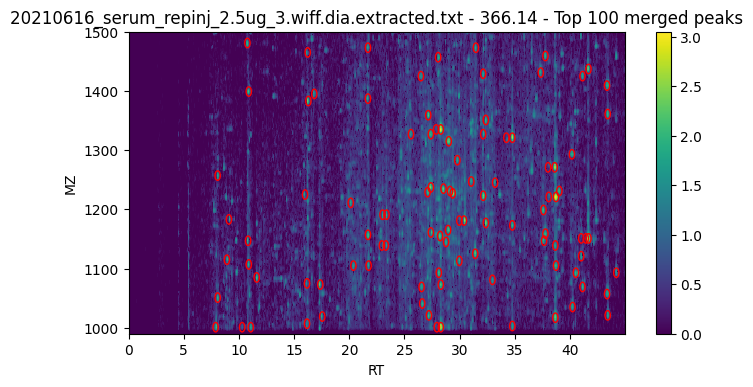

[9930.223519250001, 12259.1338275, 9599.839507499999, 6679.4582675, 4459.7934525]


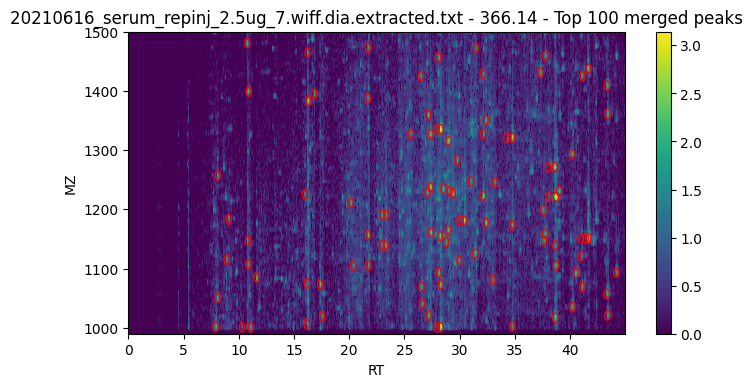

[11237.52153625, 11469.4136175, 9372.429035, 7382.812804500001, 4335.247997500001]


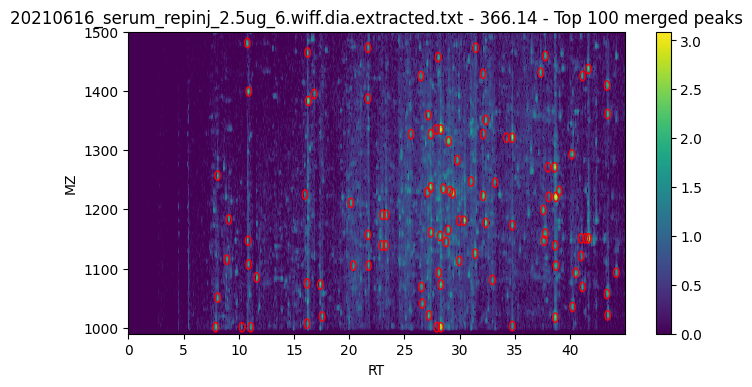

[10891.9713445, 12533.211607500001, 9198.512905, 7146.4973775, 4516.5995675]


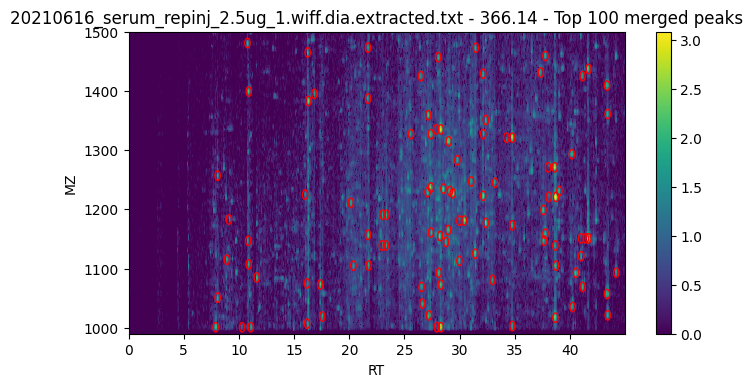

[10774.82379375, 12237.674897500001, 9620.73105, 6704.20282, 4578.42736]


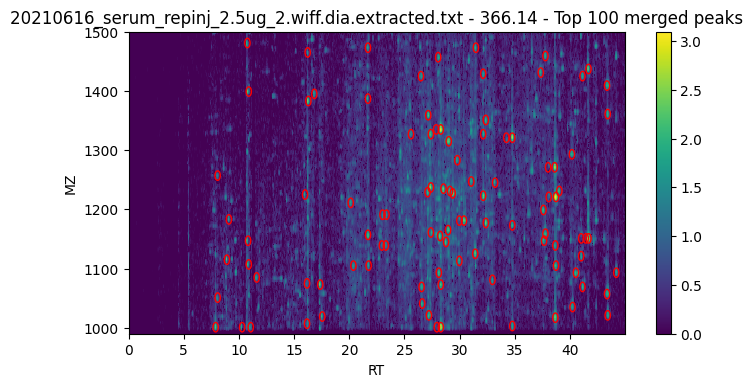

[10298.611225249999, 11963.8017625, 9568.52322, 7073.088905, 4805.673397500001]


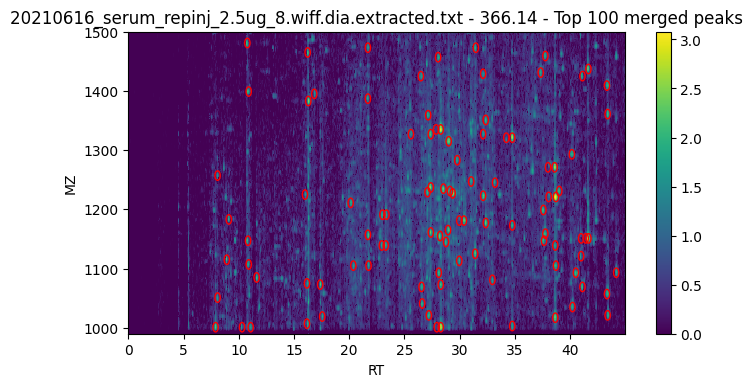

[10365.991298249999, 12811.095072499998, 9933.181209999999, 6815.0210675, 4442.76553]


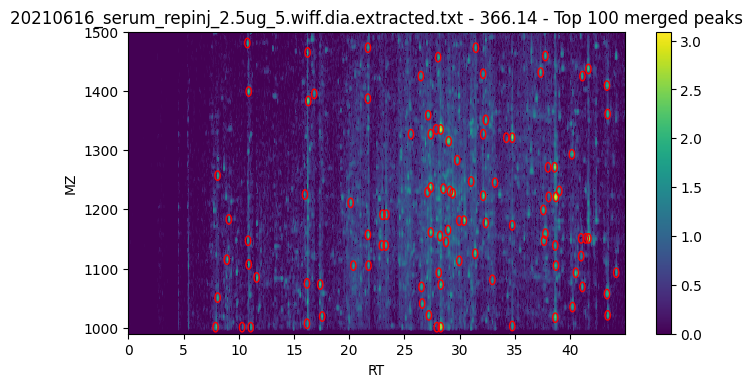

[11064.072482750002, 12713.5787175, 9989.234642500001, 7147.632755, 4645.0936675]


In [7]:
for name, spectrum in binned_spectra.items():
    ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(spectrum, ion)
    glycoproteomics.plotting.plot_ion_matrix_with_peaks(
        ion_matrix,
        x_label,
        y_label,
        peaks,
        x_radius,
        y_radius,
        "{} - ".format(name) + ion + " - Top {} merged peaks".format(top_N_peaks),
        figure_size,
        dpi
    )
    plt.show()
    peak_values = glycoproteomics.peaks.integrate(
        ion_matrix, x_label, y_label, peaks, x_radius, y_radius, np.sum
    )
    print(peak_values[:5])
